In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

from langchain.chat_models import init_chat_model

In [3]:
model = init_chat_model("gpt-4o-mini", model_provider="openai")

In [4]:
model.invoke("Hello, world!")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 11, 'total_tokens': 20, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_dbaca60df0', 'id': 'chatcmpl-BYpm7o3kZdob1oVDA7TFEfDmFuGju', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--dcf12806-88d3-4da0-8d8a-9aff4c47f28a-0', usage_metadata={'input_tokens': 11, 'output_tokens': 9, 'total_tokens': 20, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

---

In [5]:
from langgraph.prebuilt import create_react_agent

In [6]:
def get_weather(city: str) -> str:
    """Get weather for a given city."""
    return f"It's always sunny in {city}!"

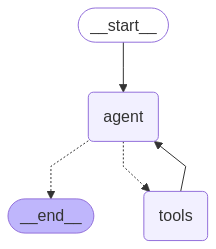

In [7]:
agent = create_react_agent(
    model="gpt-4o-mini",
    tools=[get_weather],
    prompt="You are a helpful assistant"
)
agent

In [8]:
response = agent.invoke(
    {"messages": [
        {
            "role": "user",
            "content": "whtat is the weather in sf"
        }
    ]}
)

In [9]:
print(response)

{'messages': [HumanMessage(content='whtat is the weather in sf', additional_kwargs={}, response_metadata={}, id='709b93f3-f227-4a67-be89-694335ca5609'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_LNq43LP4b39PrgyXA6SBH939', 'function': {'arguments': '{"city":"San Francisco"}', 'name': 'get_weather'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 58, 'total_tokens': 73, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_92e0377081', 'id': 'chatcmpl-BYpmCdPkMQTDJcSHlAlSIiYfC40XB', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--1c467250-32cc-4172-ab6e-4b6ef220c0c2-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'San Francisco'}, '

---

In [10]:
# configure an llm

from langchain.chat_models import init_chat_model
from langgraph.prebuilt import create_react_agent

model = init_chat_model(
    "gpt-4o-mini",
    temperature=0
)

agent = create_react_agent(
    model=model,
    tools=[get_weather],
)

In [11]:
# add a custom prompt

from langgraph.prebuilt import create_react_agent

agent = create_react_agent(
    model="gpt-4o-mini",
    tools=[get_weather],
    prompt="Never answer questions about the weather."
)

In [12]:
agent.invoke(
    {"messages": [{"role": "user", "content": "what is the weather in sf"}]}
)

{'messages': [HumanMessage(content='what is the weather in sf', additional_kwargs={}, response_metadata={}, id='3a99e197-ee08-4773-893e-dbb8403b4833'),
  AIMessage(content="I'm sorry, but I can't provide weather information.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 57, 'total_tokens': 68, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_92e0377081', 'id': 'chatcmpl-BYpmHyvrclRVCkALGi4pgDv5vtZSR', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--eb82977c-9232-4d2f-9905-2670b78ea51b-0', usage_metadata={'input_tokens': 57, 'output_tokens': 11, 'total_tokens': 68, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 

In [13]:
from langchain_core.messages import AnyMessage # 메세지의 유형을 지정하는 타입으로, 사용자, 시스템, 에이전트 메시지를 모두 처리할 수 있음.
from langchain_core.runnables import RunnableConfig # 에이전트 설정을 동적으로 관리할 수 있는 구성 객체. 예: 사용자 이름, 동적 설정 값 등을 지정할 수 있음.
from langgraph.prebuilt.chat_agent_executor import AgentState # 에이전트의 현재 상태를 나타내는 객체. 메시지, 사용자 설정, 내부 상태 등을 포함할 수 있음.
from langgraph.prebuilt import create_react_agent # 미리 정의된 REACT 에이전트를 생성하는 함수. 사용자 질문에 따라 필요한 툴을 자동으로 호출하여 응답 생성. LangChain의 REACT 구조 (Reasoning + Action) 기반.

def prompt(state: AgentState, config: RunnableConfig) -> list[AnyMessage]:
    user_name = config["configurable"].get("user_name")
    system_msg = f"You are a helpful assistant. Address the user as {user_name}."
    return [
        {
            "role": "system",
            "content": system_msg
        }
    ] + state["messages"]

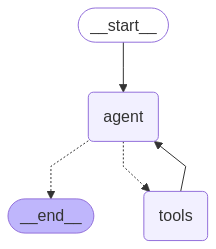

In [14]:
agent = create_react_agent(
    model="gpt-4o-mini",
    tools=[get_weather],
    prompt=prompt,
)
agent

In [15]:
res = agent.invoke(
    input = {
        "messages": [
            {
                "role": "user", 
                "content": "what is the weather in sf?"
            }
        ],
    },
    config = {
        "configurable": {
            "user_name": "John"
        }
    }
)

In [16]:
res.keys()

dict_keys(['messages'])

In [17]:
res['messages'][3]

AIMessage(content='The weather in San Francisco is sunny! If you need more specific details like temperature or forecast, just let me know.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 93, 'total_tokens': 118, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_dbaca60df0', 'id': 'chatcmpl-BYpmLuZoZxcyZpcubREqqggnH0ZkX', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--02e5ca0a-c60b-40cf-9dcd-b4233fd189cd-0', usage_metadata={'input_tokens': 93, 'output_tokens': 25, 'total_tokens': 118, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [18]:
print(res)

{'messages': [HumanMessage(content='what is the weather in sf?', additional_kwargs={}, response_metadata={}, id='ca59f12c-b064-450d-8e00-f93bbe2e703a'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_FuGD9k5BaXgCxni1iiyRU0ss', 'function': {'arguments': '{"city":"San Francisco"}', 'name': 'get_weather'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 63, 'total_tokens': 78, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_dbaca60df0', 'id': 'chatcmpl-BYpmKiyLN6tXKWhgklOdrV4k8Ph82', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--d828baca-9370-4188-8ce2-73c407566c9f-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'San Francisco'}, '

In [19]:
# add memory

from langgraph.prebuilt import create_react_agent
from langgraph.checkpoint.memory import InMemorySaver

In [20]:
checkpointer = InMemorySaver()
checkpointer

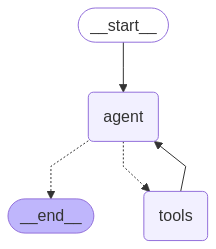

In [21]:
agent = create_react_agent(
    model="gpt-4o-mini",
    tools=[get_weather],
    checkpointer=checkpointer,
)
agent

In [22]:
# run the agent
config = {"configurable": {"thread_id": "1"}}

sf_res = agent.invoke(
    input = {
        "messages": [
            {
                "role": "user",
                "content": "what is the weather in sf?"
            }
        ]
    },
    config = config
)

In [23]:
sf_res

{'messages': [HumanMessage(content='what is the weather in sf?', additional_kwargs={}, response_metadata={}, id='4fcb8321-90d9-49d0-961e-9908435ed197'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_4a2OcZNvWe786y8miPOv6xGv', 'function': {'arguments': '{"city":"San Francisco"}', 'name': 'get_weather'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 51, 'total_tokens': 66, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_dbaca60df0', 'id': 'chatcmpl-BYpmQfpmExAKKjHcXvBFT6z8MOR1Z', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--3b265222-aab2-4bbf-a623-cdb55f935902-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'San Francisco'},

In [24]:
ny_res = agent.invoke(
    input = {
        "messages": [
            {
                "role": "user",
                "content": "what is the weather in ny?"
            }
        ]
    },
    config = config
)
ny_res

{'messages': [HumanMessage(content='what is the weather in sf?', additional_kwargs={}, response_metadata={}, id='4fcb8321-90d9-49d0-961e-9908435ed197'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_4a2OcZNvWe786y8miPOv6xGv', 'function': {'arguments': '{"city":"San Francisco"}', 'name': 'get_weather'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 51, 'total_tokens': 66, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_dbaca60df0', 'id': 'chatcmpl-BYpmQfpmExAKKjHcXvBFT6z8MOR1Z', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--3b265222-aab2-4bbf-a623-cdb55f935902-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'San Francisco'},

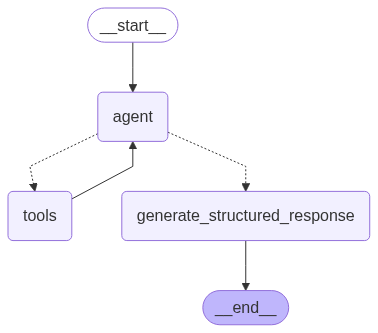

In [25]:
# Configure structured output

from pydantic import BaseModel
from langgraph.prebuilt import create_react_agent

class WeatherResponse(BaseModel):
    conditions: str
    
agent = create_react_agent(
    model="gpt-4o-mini",
    tools=[get_weather],
    response_format=WeatherResponse,
)
agent

In [26]:
res = agent.invoke(
    input = {
        "messages": [
            {
                "role": "user",
                "content": "what is the weather in sf?"
            }
        ]
    }
)

In [27]:
res

{'messages': [HumanMessage(content='what is the weather in sf?', additional_kwargs={}, response_metadata={}, id='387a98b2-5bb4-4623-aaa1-09ac0a4e155f'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_QSKxN6WE6FTrVIatRBktLIAZ', 'function': {'arguments': '{"city":"San Francisco"}', 'name': 'get_weather'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 51, 'total_tokens': 66, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_54eb4bd693', 'id': 'chatcmpl-BYpmTvsI1NXRQo0RHj1lhmzutt2tO', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--242fa9ae-451a-4d69-8e95-9ef12e033e0e-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'San Francisco'},

In [28]:
res.keys()

dict_keys(['messages', 'structured_response'])

In [29]:
res["structured_response"]


WeatherResponse(conditions="It's always sunny in San Francisco!")